# Lick events

*Imports and data_folder access*

In [1]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
#data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [2]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

In [3]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 0-10
fm.get_files_in_data_path(selected_data_session)

['Z:\\davide\\2p_data\\441394_ribolla\\20230315\\behaviour_data.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\cnmf.hdf5',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\decoded_log.mat',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\metrics.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\neural_data.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\parameters.yml',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\tif_header.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\trial_data.csv']

In [4]:
selected_data_session

WindowsPath('Z:/davide/2p_data/441394_ribolla/20230315')

In [5]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


# Goal 1: reward licks, fraction of licks during reward presentation, eventplot of licks
1. isolate the reward presentation for each trial. Find the number of licks that happened between the reward presentation and two seconds (2000 frames) after.
2. use eventplot to plot the licks for each trial on the same plot (x axis: time, y axis: trial)

This will tell us if there is a change in licking patterns during the course of the trial

*Trial Matrix*

In [6]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
#trial_data

*Behavioural Data*

In [7]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [8]:
import sys
sys.path.append('../src') # Add src folder to path.

import lick_analysis as la # Import my lick analysis functions from /src.

In [9]:
# Call the function and print the results.
lick_count, reward_fraction = la.lick_counter(trial_data, b_data)
print("Number of licks during reward window:", lick_count)
print("Fraction of licks at reward onset:", reward_fraction)

Number of licks during reward window: 216
Fraction of licks at reward onset: 25.0


216
0.25


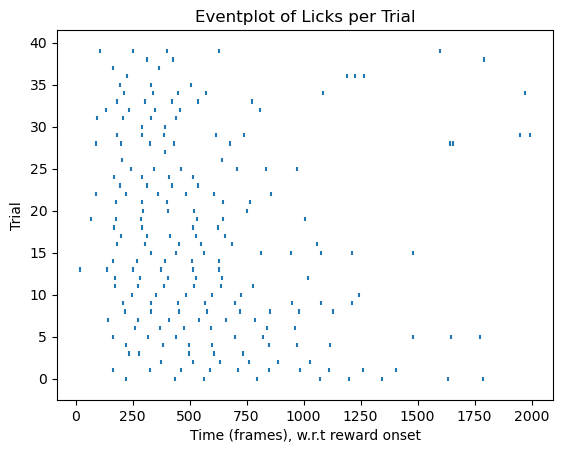

(216,
 0.25,
 [[221, 437, 563, 794, 1072, 1200, 1344, 1631, 1787],
  [163, 328, 460, 591, 713, 846, 984, 1112, 1260, 1404],
  [376, 515, 634, 762, 889, 1030],
  [236, 278, 495, 607, 736],
  [219, 385, 498, 600, 849, 971, 1117],
  [163, 319, 442, 700, 823, 1480, 1645, 1775],
  [260, 370, 475, 592, 838, 961],
  [140, 274, 411, 540, 659, 788],
  [217, 330, 452, 576, 720, 854, 981, 1128],
  [208, 329, 449, 569, 699, 949, 1077, 1211],
  [245, 354, 483, 598, 727, 1242],
  [173, 272, 388, 520, 639, 776],
  [174, 281, 405, 526, 641, 1017],
  [17, 138, 252, 376, 513, 630],
  [162, 269, 390, 509, 627],
  [330, 441, 565, 815, 945, 1078, 1210, 1478],
  [183, 306, 451, 549, 685, 1057],
  [199, 312, 414, 528, 657],
  [168, 289, 514, 625],
  [69, 177, 287, 530, 644, 1008],
  [295, 403, 517, 752],
  [177, 290, 399, 645, 763],
  [87, 220, 361, 482, 605, 855],
  [195, 311, 423, 538],
  [167, 293, 410, 516],
  [241, 343, 462, 709, 833, 972],
  [205, 642],
  [391],
  [91, 200, 326, 430, 678, 1642, 1654],


In [10]:
save_folder = Path('./imgs/lick_eventplots')
la.lick_eventplot(trial_data, b_data, selected_data_session, save_folder)

216
0.25


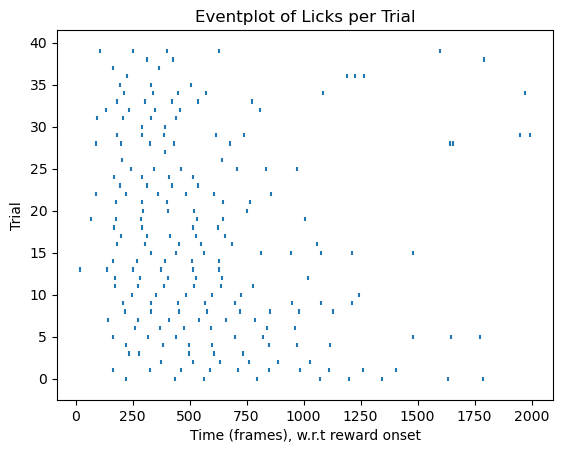

267
0.47424511545293074


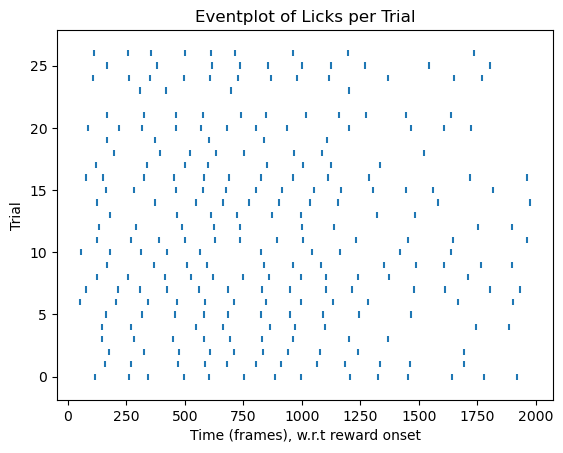

433
0.4681081081081081


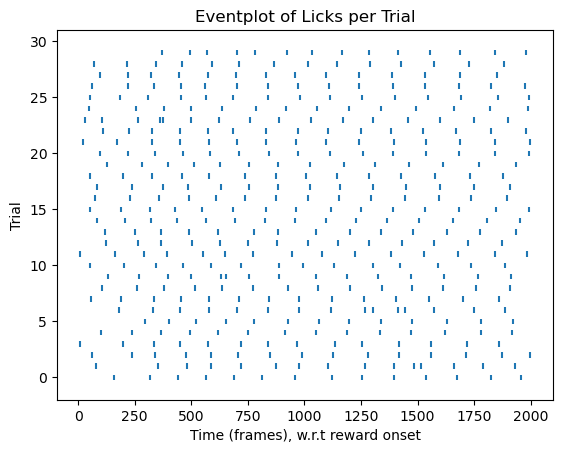

395
0.1620180475799836


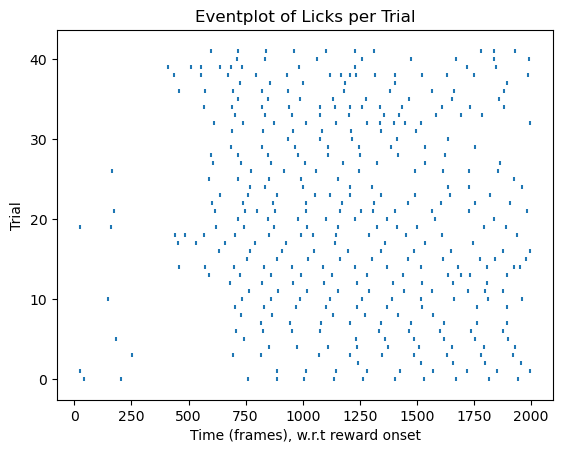

349
0.4144893111638955


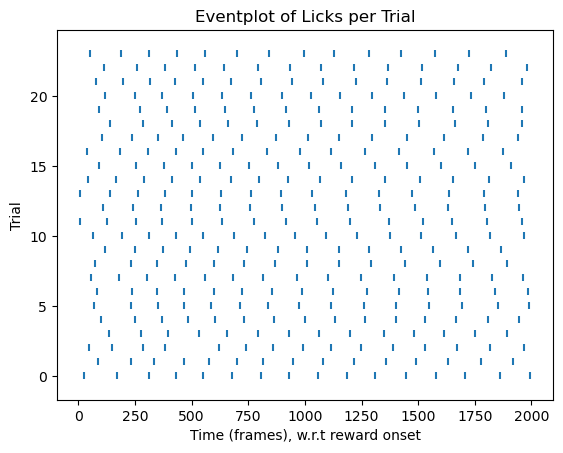

31
0.15897435897435896


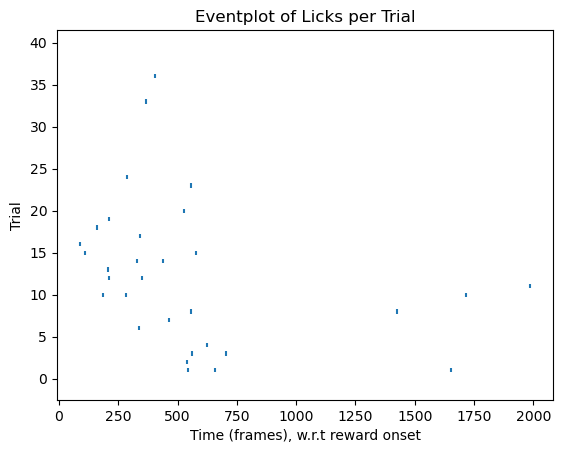

183
0.19530416221985059


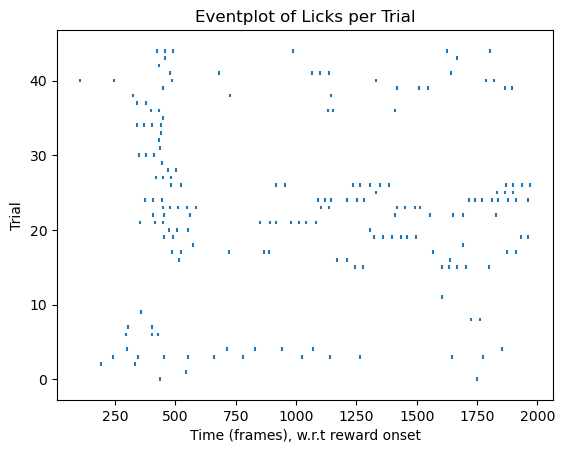

282
0.09255004922874958


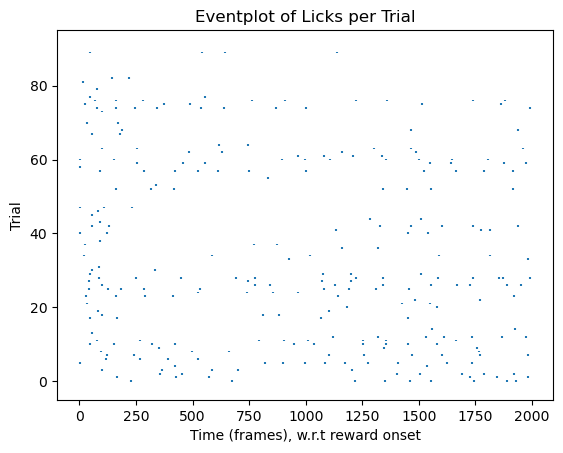

12
0.011352885525070956


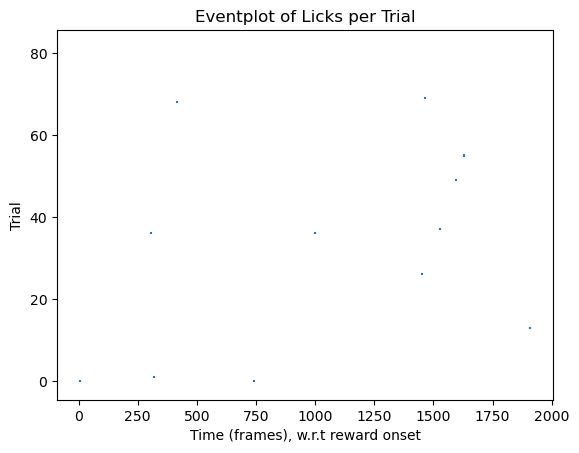

395
0.2607260726072607


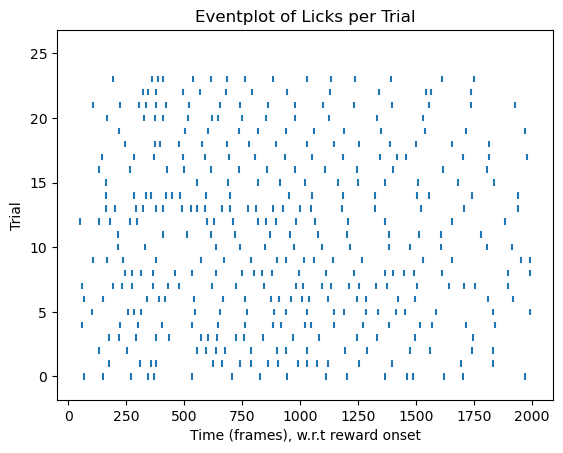

<Figure size 640x480 with 0 Axes>

In [11]:
# Create an empty dataframe to store the lick results
licks_df = pd.DataFrame(columns=['Session', 'Licks', 'Reward licks'])

for session in all_data_paths[1:]:

    trial_data_file = session.joinpath('trial_data.csv')
    trial_data = pd.read_csv(trial_data_file)

    bdata_file = session.joinpath('behaviour_data.pickle')
    with open(bdata_file,'rb') as file:
        b_data = pickle.load(file)

    # create save folder for lick eventplots
    save_folder = Path('./imgs/lick_eventplots')
    save_folder.mkdir(exist_ok=True,parents=True)

    # Call the function and print the results.
    lick_count, reward_fraction, reward_licks_list = la.lick_eventplot(trial_data, b_data, selected_data_session, save_folder)

    # Create a temporary dataframe for the licks results of the current session
    session_licks_df = pd.DataFrame({
        'Session': [str(session)],
        'Licks': [lick_count],
        'Reward Licks': [reward_fraction],
    })

    # Append the temporary licks dataframe to the licks dataframe
    licks_df = pd.concat([licks_df, session_licks_df], ignore_index=True)

    # Create the eventplot.
    plt.eventplot(reward_licks_list, lineoffsets=1, linelengths=0.5)

    # Add axis labels and title.
    plt.xlabel("Time (frames), w.r.t reward onset")
    plt.ylabel("Trial")
    plt.title("Eventplot of Licks per Trial")

    # Get the session number and parent folder from the session path
    session_number = os.path.basename(session)
    parent_folder = os.path.basename(os.path.dirname(session))

    # Concatenate the parent folder and session number
    session_name = f"{parent_folder}_{session_number}"

    # Set the image file name
    image_name = f"{session_name}_lick_event_plot.png"

    # Set the complete save path including the folder and image name
    save_path = os.path.join(save_folder, image_name)

    # Save the plot as an image file
    plt.savefig(save_path)

    # Clear the current plot to prepare for the next one
    plt.clf()

# Show the saved plots
plt.show()

In [12]:
# Specify the desired path and filename for licks_df
licks_df_output_path = Path('../data/final/lick_stats.csv')

# Save the velocity dataframe to a CSV file
licks_df.to_csv(licks_df_output_path, index=False)